In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection  import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [2]:
beyonce = pd.read_csv('./data/dataframes/beyonce_lyrics.csv', index_col=0)
beyonce.head(10)

,lyrics
artist,
beyonce,[Repeat: x2] You were bad girl and your friend...
beyonce,"Oh, baby, how you doing? You know I'm-a cut ri..."
beyonce,Sometimes these walls seem to cave in on me Wh...
beyonce,"All the ladies, if you feel me, help me sing i..."
beyonce,"Head down, as I watch my feet take turns hitti..."
beyonce,"To be or not to be Not! Hold up, bring the be..."
beyonce,"Yeah, yeah, yeah, yeah, yeah Yeah, yeah, yeah,..."
beyonce,(Ladies on the floor) (All my ladies on the fl...
beyonce,"Yes It's so crazy right now Most incredibly, i..."


In [3]:
coldplay = pd.read_csv('./data/dataframes/coldplay_lyrics.csv', index_col=0)
coldplay

,lyrics
artist,
coldplay,"Could you, could you come back Come back toget..."
coldplay,Come up to meet you Tell you I'm sorry You don...
coldplay,"To my surprise, and my delight I saw sunrise, ..."
coldplay,In the darkness before the dawn In the swirlin...
coldplay,"Well, they say people come The say people go T..."
...,...
coldplay,My song is love Love to the lovers shone And i...
coldplay,"And the hardest part Was letting go, not takin..."
coldplay,"Holy, holy, dove descend Soft and slowly When ..."


In [4]:
beyonce.duplicated().sum()

1173

In [5]:
coldplay.duplicated().sum()

1228

In [6]:
beyonce.drop_duplicates(inplace=True)
coldplay.drop_duplicates(inplace=True)

In [7]:
print(beyonce.shape, coldplay.shape)

(319, 1) (227, 1)


In [8]:
frames = [beyonce, coldplay]
  
lyrics = pd.concat(frames)
lyrics

,lyrics
artist,
beyonce,[Repeat: x2] You were bad girl and your friend...
beyonce,"Oh, baby, how you doing? You know I'm-a cut ri..."
beyonce,Sometimes these walls seem to cave in on me Wh...
beyonce,"All the ladies, if you feel me, help me sing i..."
beyonce,"Head down, as I watch my feet take turns hitti..."
...,...
coldplay,Look at earth from outer space Everyone must f...
coldplay,She floats like a swan Grace on the water Lips...
coldplay,Those who are dead are not dead They're just ...


In [9]:
y=lyrics.index
y

Index(['beyonce', 'beyonce', 'beyonce', 'beyonce', 'beyonce', 'beyonce',
       'beyonce', 'beyonce', 'beyonce', 'beyonce',
       ...
       'coldplay', 'coldplay', 'coldplay', 'coldplay', 'coldplay', 'coldplay',
       'coldplay', 'coldplay', 'coldplay', 'coldplay'],
      dtype='object', name='artist', length=546)

In [10]:
X=lyrics.reset_index()['lyrics']
X

0      [Repeat: x2] You were bad girl and your friend...
1      Oh, baby, how you doing? You know I'm-a cut ri...
2      Sometimes these walls seem to cave in on me Wh...
3      All the ladies, if you feel me, help me sing i...
4      Head down, as I watch my feet take turns hitti...
                             ...                        
541    Look at earth from outer space Everyone must f...
542    She floats like a swan Grace on the water Lips...
543    Those who are dead are not dead  They're just ...
544    Love, I hope we get on  I hope we can find a w...
545    Come on now, don't you want to see  This thing...
Name: lyrics, Length: 546, dtype: object

## Bag of words

In [11]:
preprocessing = CountVectorizer()

In [12]:
lyrics_vec = preprocessing.fit_transform(X)#.todense() # todense used to show the matrix, not needed for ML workflow

### The Tf-Idf Transformer:

"Transform a count matrix to a normalized tf-idf representation"

 => scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

* TF - Term Frequency (% count of a word w in doc d)
* IDF - Inverse Document Frequency

$TFIDF = TF(w,d) * IDF(w)$

$IDF(w) = log(\frac{1+ no.documents}{1 + no.documents containing word w})+1$

##### The steps for calculating TFIDF are:
* For each vector:
    * Calculate the term frequency for each term in the vector
    * Calculate the inverse doc frequency for each term in the vector
    * Multiply the two for each term in the vector
* Then normalise each vector by the Euclidean norm (numpy.linalg.norm)
    * $norm = \frac{v}{||v||^2}$

In [13]:
preprocessing_tfidf = TfidfVectorizer(max_df=0.5, ngram_range=(1,2), stop_words='english')

In [14]:
lyrics_tfidf = preprocessing_tfidf.fit_transform(X)

In [15]:
df_tfidf = pd.DataFrame(lyrics_tfidf.todense(), index=y, columns=preprocessing_tfidf.get_feature_names())
df_tfidf.shape #7169 different words

(546, 37891)

## Pipeline

In [16]:
model = make_pipeline(
                    preprocessing_tfidf, #TfidfVectorizer
                    LogisticRegression()
)

In [17]:
model.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer',
   TfidfVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english'),
 'logisticregression': LogisticRegression(),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 0.5,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 2),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': 'english',
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__t

## Train Test splite 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Hyperparameter GridSearch

In [19]:
## WARNING: Too much hyperparameters!!! 
param_grid = {
    'tfidfvectorizer__ngram_range': [(1,1), (1,2)],
    'tfidfvectorizer__max_df': [0.25, 0.5, 0.75, 1.0],
    'tfidfvectorizer__stop_words': [None, 'english'],
    'tfidfvectorizer__min_df': [2,3,4,5],
    'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'logisticregression__max_iter': [100,250,500,1000],
    'logisticregression__class_weight': [None, 'balanced'],
    #'randomforestclassifier__max_depth': [None, ''],
    #'randomforestclassifier__n_estimators': [50, 100, 150]
}

In [20]:
grid_cv = GridSearchCV(
            estimator=model,
            param_grid= param_grid,
            cv=5,
            return_train_score=True,
            scoring= 'accuracy',
            n_jobs=-1
)

In [23]:
grid_cv.fit(X_train, y_train)

/Users/emre/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(max_df=0.5,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10,
                                                   100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__max_iter': [100, 250, 500, 1000],
                         'tfidfvectorizer__max_df': [0.25, 0.5, 0.75, 1.0],
                         'tfidfvectorizer__min_df': [2, 3, 4, 5],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                   

In [24]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logisticregression__C', 'param_logisticregression__class_weight', 'param_logisticregression__max_iter', 'param_tfidfvectorizer__max_df', 'param_tfidfvectorizer__min_df', 'param_tfidfvectorizer__ngram_range', 'param_tfidfvectorizer__stop_words', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [25]:
col=['param_tfidfvectorizer__ngram_range',
     'param_tfidfvectorizer__max_df',
     'param_tfidfvectorizer__min_df',
     'param_tfidfvectorizer__stop_words',
     'param_logisticregression__class_weight',
     'param_logisticregression__C',
     #'param_randomforestclassifier__n_estimators',
     'mean_train_score', 
     'mean_test_score', 
     'rank_test_score' 
    ]

In [26]:
cv_results=pd.DataFrame(grid_cv.cv_results_)

In [27]:
cv_results[col].sort_values(by='rank_test_score', ascending=True )

,param_tfidfvectorizer__ngram_range,param_tfidfvectorizer__max_df,param_tfidfvectorizer__min_df,param_tfidfvectorizer__stop_words,param_logisticregression__class_weight,param_logisticregression__C,mean_train_score,mean_test_score,rank_test_score
3474,"(1, 1)",0.25,5,None,balanced,10,0.997555,0.897260,1
3570,"(1, 1)",0.25,5,None,balanced,10,0.997555,0.897260,1
3666,"(1, 1)",0.25,5,None,balanced,10,0.997555,0.897260,1
3762,"(1, 1)",0.25,5,None,balanced,10,0.997555,0.897260,1
3468,"(1, 1)",0.25,4,None,balanced,10,0.997555,0.892412,5
...,...,...,...,...,...,...,...,...,...
1089,"(1, 2)",0.5,3,english,None,0.01,0.586798,0.586811,3517
1090,"(1, 3)",0.5,3,None,None,0.01,0.586798,0.586811,3517
1091,"(1, 3)",0.5,3,english,None,0.01,0.586798,0.586811,3517
1074,"(1, 1)",0.25,5,None,None,0.01,0.586798,0.586811,3517


<AxesSubplot:xlabel='param_logisticregression__C'>

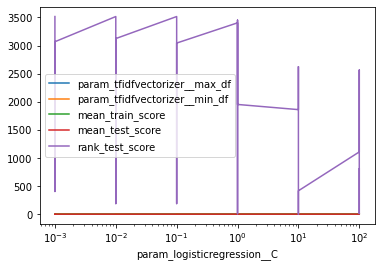

In [34]:
# plot the train and test score
cv_results[col].plot(x='param_logisticregression__C', logx=True)

In [28]:
grid_cv.best_params_


{'logisticregression__C': 10,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__max_iter': 100,
 'tfidfvectorizer__max_df': 0.25,
 'tfidfvectorizer__min_df': 5,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__stop_words': None}

In [35]:
best_model = grid_cv.best_estimator_

In [49]:
import pickle

with open('model.pickle', 'wb') as file:
    pickle.dump(best_model, file)

## Prediction on Test Data

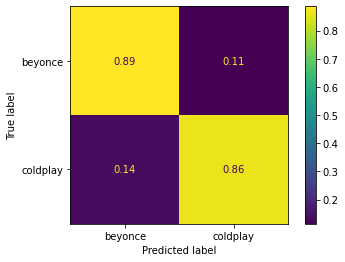

In [36]:
metrics.plot_confusion_matrix(best_model,
                              X_test,
                              y_test,
                              normalize='true')

In [37]:
y_pred = best_model.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.8759124087591241

In [38]:
# get a list of all feature weights
coefs = best_model[1].coef_

In [39]:
# get a list of all words used in the vectorizer
words = best_model[0].get_feature_names()

In [40]:
# get a list of all words used in the vectorizer
words = best_model[0].get_feature_names()

In [42]:
# construct a DataFrame
importance = pd.DataFrame({
    'weight': coefs[0],
    'feature': words
})

In [44]:
importance.sort_values('weight', ascending=True).tail(30)

,weight,feature
973,1.831814,tear
368,1.836780,future
886,1.877298,some
748,1.893631,rain
671,1.917973,ooh
943,1.950352,such
293,1.973010,eyes
217,1.982395,dark
1062,2.034036,waiting
96,2.055859,bones


In [46]:
test_words = [
    'dance',
    'sky',
    'f*ck',
    "let's dance tonight"
]

pred = best_model.predict_proba(test_words)

pd.DataFrame(pred, 
             columns = best_model[1].classes_, 
             index=test_words
)

,beyonce,coldplay
dance,0.703633,0.296367
sky,0.120771,0.879229
f*ck,0.706996,0.293004
let's dance tonight,0.867089,0.132911
